In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [31]:
data=pd.read_csv("IceCreamData.csv")
print(data.isna().sum())

Temperature    0
Revenue        0
dtype: int64


In [32]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=0)

In [34]:
from sklearn.ensemble import RandomForestRegressor
ab=RandomForestRegressor()
ab.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
y_pred=ab.predict(x_test)
print(y_pred)

[690.06340676 640.76334847 651.57928461 467.98665657 648.28537877
 429.72842678 574.02276496 636.72847713 662.56100459 466.86583046
 517.85732332 464.25284102 640.92211998 379.38048444 357.49232284
 950.50261732 910.11398709 683.67861148 518.0661301  403.93672818
 380.97760177 613.72432858 282.81814096 683.88312301 402.38264802]


In [36]:
d1=pd.DataFrame({'Real Values':y_test,'Predicted Values':y_pred})
print(d1)

    Real Values  Predicted Values
0    704.281439        690.063407
1    632.901914        640.763348
2    662.558990        651.579285
3    449.813300        467.986657
4    636.298374        648.285379
5    469.909033        429.728427
6    587.221246        574.022765
7    581.074005        636.728477
8    675.828916        662.561005
9    493.710333        466.865830
10   506.432135        517.857323
11   427.138369        464.252841
12   644.488633        640.922120
13   350.629036        379.380484
14   366.247714        357.492323
15   965.493040        950.502617
16   898.805423        910.113987
17   648.453609        683.678611
18   586.138767        518.066130
19   405.661446        403.936728
20   395.273750        380.977602
21   572.537048        613.724329
22   288.158145        282.818141
23   643.788331        683.883123
24   396.935648        402.382648


Text(0, 0.5, 'Revenue')

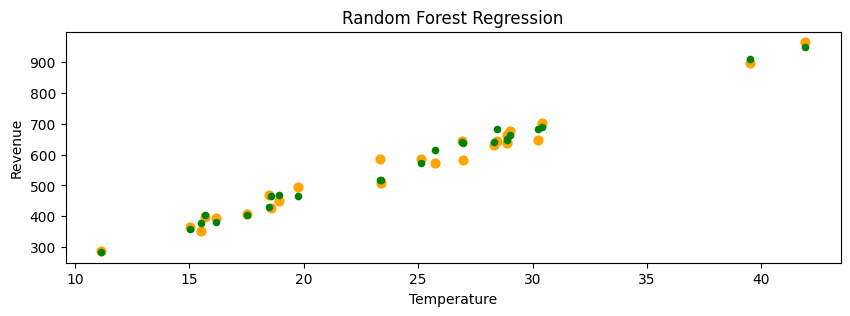

In [37]:
plt.figure(figsize=(10,3))
plt.scatter(x_test,y_test,color='orange',s=40,label="original-data")
plt.scatter(x_test,y_pred,color='green',s=20,label="predicted")
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

<ipython-input-38-71b1798ee043>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid=np.arange(min(x),max(x),0.01)


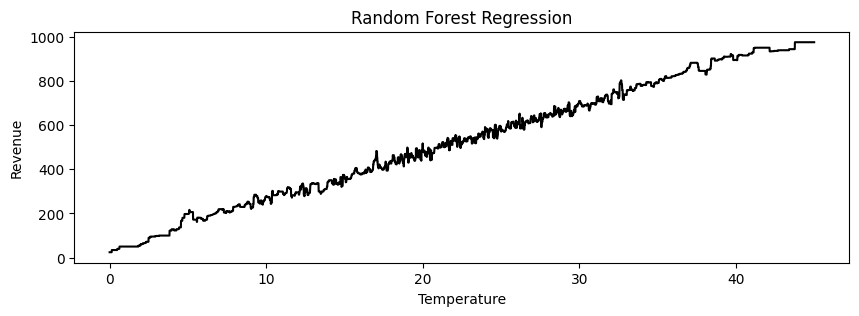

In [38]:
plt.figure(figsize=(10,3))
grid=np.arange(min(x),max(x),0.01)
grid=grid.reshape(-1,1)
plt.plot(grid,ab.predict(grid),color='black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [39]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R-Square : ",r2_score(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("Squared Mean Squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))

R-Square :  0.9703937835549222
Mean Squared Error :  754.4832319919755
Mean absolute error :  21.586603459520067
Squared Mean Squared error :  27.467858161712854


# **Hyper Parameter tuning**

In [48]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=100,num=10)]

max_features=['sqrt']

max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

min_samples_split=[2,4,6]

min_sample_leaf=[2,4,6]

bootstrap=[True,False]

criterion=['squared_error','absolute_error']

param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_sample_leaf,
            'bootstrap':bootstrap,
            'criterion':criterion}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6], 'bootstrap': [True, False], 'criterion': ['squared_error', 'absolute_error']}


In [49]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
gs=GridSearchCV(model,param_grid=param_grid,cv=5,n_jobs=-1)

gs.fit(x_train,y_train)

print(gs.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}


In [52]:
modl=RandomForestRegressor(bootstrap=True,criterion='absolute_error',max_depth=70,max_features='sqrt',min_samples_leaf=4,
                           min_samples_split=2,n_estimators=30)
modl.fit(x_train,y_train)
y_prd=modl.predict(x_test)

In [53]:
dat2=pd.DataFrame({'real-data':y_test,"predict-data":y_prd})
print(dat2)

     real-data  predict-data
0   704.281439    689.510004
1   632.901914    644.961259
2   662.558990    660.242656
3   449.813300    466.481143
4   636.298374    660.293690
5   469.909033    435.758908
6   587.221246    575.836893
7   581.074005    630.557105
8   675.828916    662.897791
9   493.710333    472.580008
10  506.432135    536.463068
11  427.138369    446.222417
12  644.488633    629.904499
13  350.629036    363.369442
14  366.247714    359.855544
15  965.493040    922.159037
16  898.805423    914.430598
17  648.453609    689.519913
18  586.138767    536.463068
19  405.661446    406.139993
20  395.273750    383.055770
21  572.537048    597.553139
22  288.158145    293.680588
23  643.788331    651.244025
24  396.935648    381.133498


In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R-Square : ",r2_score(y_test,y_prd))
print("Mean Squared Error : ",mean_squared_error(y_test,y_prd))
print("Mean absolute error : ",mean_absolute_error(y_test,y_prd))
print("Squared Mean Squared error : ",np.sqrt(mean_squared_error(y_test,y_prd)))

R-Square :  0.977005392897555
Mean Squared Error :  585.993334110168
Mean absolute error :  19.91660303593331
Squared Mean Squared error :  24.20729919074344
